### Import Packages

In [17]:
from PIL import Image
from IPython.display import display
import torch
from torchvision import models
import torch.optim as optim
import torchvision.transforms as transforms 
from idsim import IdentitySimilarity
import numpy as np

### Load and Preprocess Image

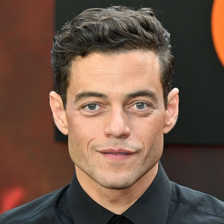

In [18]:
img = Image.open("docs/test.jpg").resize((224,224))
display(img)

In [19]:
transform = transforms.Compose([ 
    transforms.PILToTensor() 
]) 
img_tensor = transform(img).unsqueeze(0).float().cuda()
img_tensor.shape

torch.Size([1, 3, 224, 224])

### Create idsim object and set face keypoints as pre-defined template

In [20]:
idsim = IdentitySimilarity(model_name="r50", criterion="Cosine")
template = idsim.extract_keypoints(np.array(img))
idsim.set_ref_point(template)

r50 : ok!


### Create model and optimizer for training

In [21]:
model = models.mobilenet_v2(pretrained=True).cuda()
out_layer = torch.nn.Linear(1000,512).cuda()

for param in model.parameters():
    param.requires_grad = False
    
optimizer = optim.Adam(out_layer.parameters(), lr=0.001)

### Check prediction

In [22]:
x = model(img_tensor)
x = out_layer(x)
sim = idsim.forward_v2img(x,img_tensor)
print(f"First output similarity : {sim}")

First output similarity : tensor([-0.0728], device='cuda:0', grad_fn=<DivBackward0>)


### Train model for 10 steps

In [23]:
for i in range(10):
    optimizer.zero_grad()
    x = model(img_tensor)
    pred = out_layer(x)
    loss = idsim.forward_v2img(pred, img_tensor)
    loss.backward()
    optimizer.step()
    print(f" Step : {i} - Loss : {loss.item()}")

 Step : 0 - Loss : 0.021654203534126282
 Step : 1 - Loss : -0.5735048055648804
 Step : 2 - Loss : -0.7974554896354675
 Step : 3 - Loss : -0.8808934092521667
 Step : 4 - Loss : -0.9267351031303406
 Step : 5 - Loss : -0.9386858344078064
 Step : 6 - Loss : -0.9523594975471497
 Step : 7 - Loss : -0.9541137218475342
 Step : 8 - Loss : -0.9619364738464355
 Step : 9 - Loss : -0.9649853706359863


As you can see, model prediction loss is decreasing :)